In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


cnx = mysql.connector.connect(
    host="localhost",
    port="3306", 
    user="root",
    password="vikas"
)
query = "select  * from spotify.spotify;"
df = pd.read_sql(query, cnx)
cnx.close()



df = pd.read_csv("spotify_history.csv")


C:\Users\Vikas\AppData\Local\Temp\ipykernel_8332\2885205258.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


In [20]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [26]:
df['seconds_played'] = df['ms_played'] / 1000

# Basic Summary
print("🔍 Dataset Info:")
print(df.info())
print("\n📊 Statistical Summary:")
print(df.describe())

# Descriptive Stats
print("\n📌 Mean Duration (seconds):", df['seconds_played'].mean())
print("📌 Median Duration (seconds):", df['seconds_played'].median())
print("📌 Mode of Duration (seconds):", df['seconds_played'].mode()[0])
print("📌 Standard Deviation:", df['seconds_played'].std())
print("📌 Total Tracks Played:", len(df))
print("📌 Unique Artists:", df['artist_name'].nunique())
print("📌 Unique Tracks:", df['track_name'].nunique())

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   spotify_track_uri  149860 non-null  object 
 1   ts                 149860 non-null  object 
 2   platform           149860 non-null  object 
 3   ms_played          149860 non-null  int64  
 4   track_name         149860 non-null  object 
 5   artist_name        149860 non-null  object 
 6   album_name         149860 non-null  object 
 7   reason_start       149717 non-null  object 
 8   reason_end         149743 non-null  object 
 9   shuffle            149860 non-null  bool   
 10  skipped            149860 non-null  bool   
 11  seconds_played     149860 non-null  float64
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 11.7+ MB
None

📊 Statistical Summary:
          ms_played  seconds_played
count  1.498600e+05   149860.000000
mean   1.28316

##  Plays by Platform

C:\Users\Vikas\AppData\Local\Temp\ipykernel_8332\3290150373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='platform', palette='viridis')


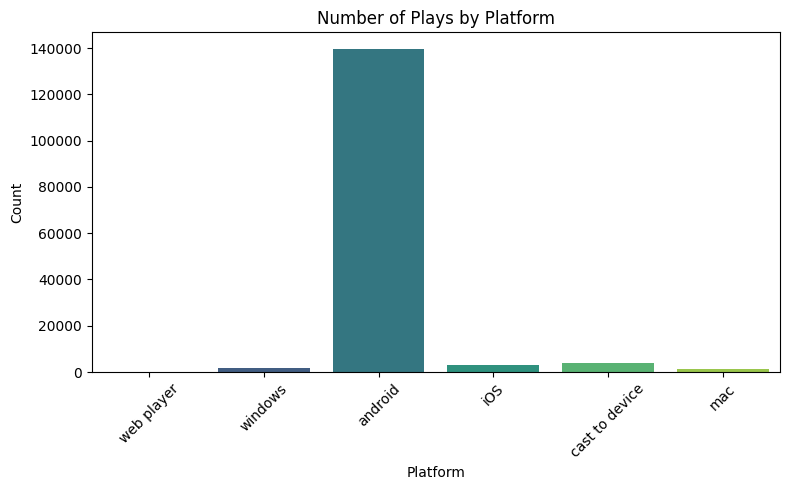

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='platform', palette='viridis')
plt.title('Number of Plays by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Distribution of Song Duration (ms_played)

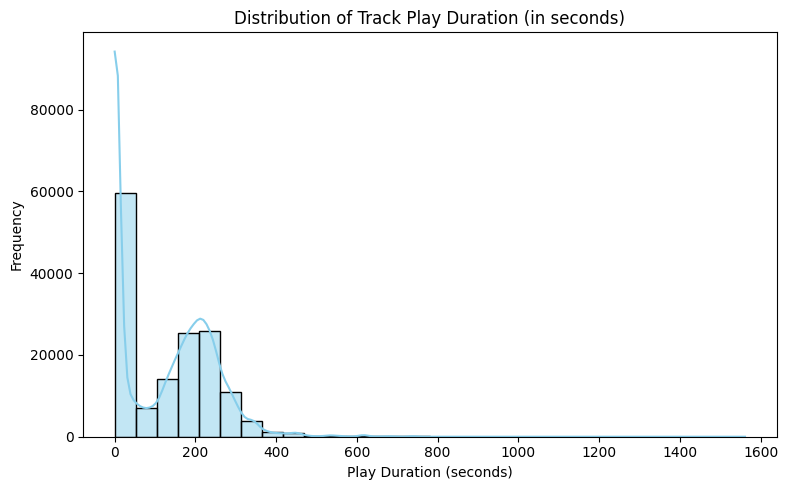

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df['ms_played'] / 1000, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Play Duration (in seconds)')
plt.xlabel('Play Duration (seconds)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Top 10 Most Played Artists

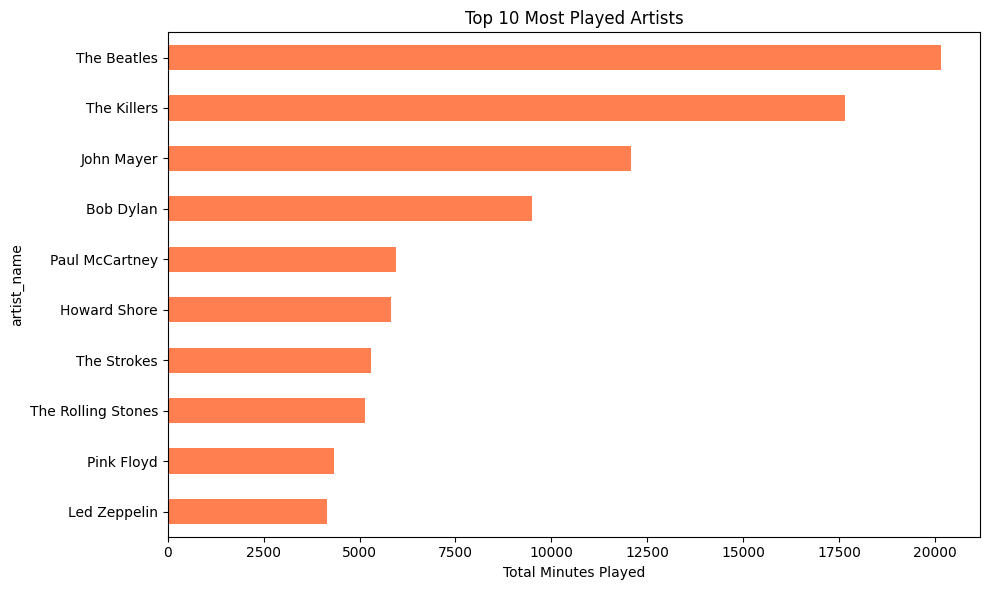

In [29]:
top_artists = df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10) / 60000

plt.figure(figsize=(10, 6))
top_artists.plot(kind='barh', color='coral')
plt.xlabel('Total Minutes Played')
plt.title('Top 10 Most Played Artists')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Top 10 Most Played Tracks

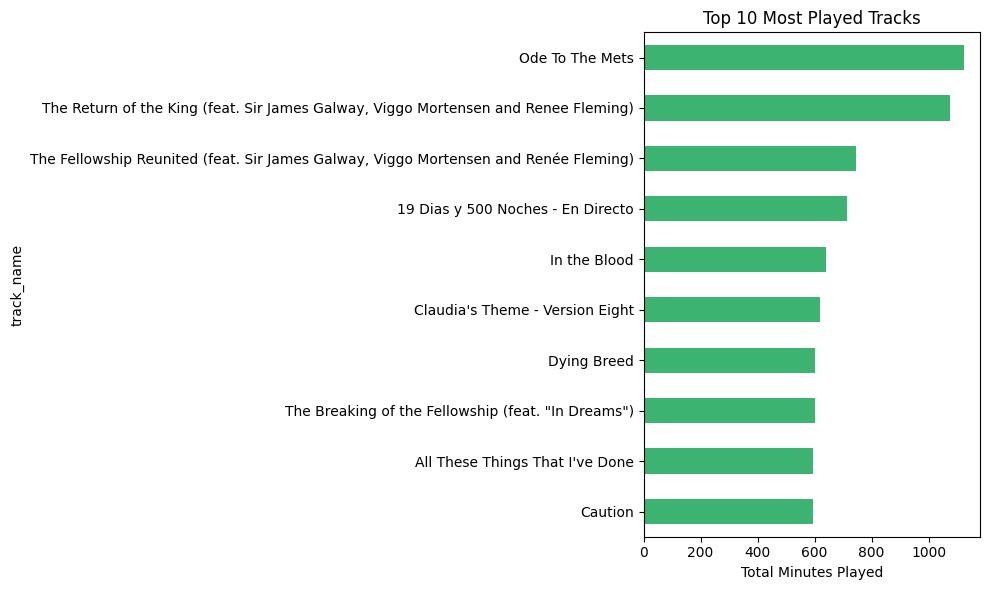

In [30]:
top_tracks = df.groupby('track_name')['ms_played'].sum().sort_values(ascending=False).head(10) / 60000

plt.figure(figsize=(10, 6))
top_tracks.plot(kind='barh', color='mediumseagreen')
plt.xlabel('Total Minutes Played')
plt.title('Top 10 Most Played Tracks')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Listening Trend Over Time

In [31]:
plt.figure(figsize=(14, 6))
plt.fill_between(daily_playtime.index, daily_playtime.values, color="skyblue", alpha=0.4)
plt.plot(daily_playtime.index, daily_playtime.values, color="blue")

plt.title("📈 Daily Listening Area Chart")
plt.xlabel("Date")
plt.ylabel("Minutes Played")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'daily_playtime' is not defined

<Figure size 1400x600 with 0 Axes>

## Reason Start vs Reason End (Heatmap)

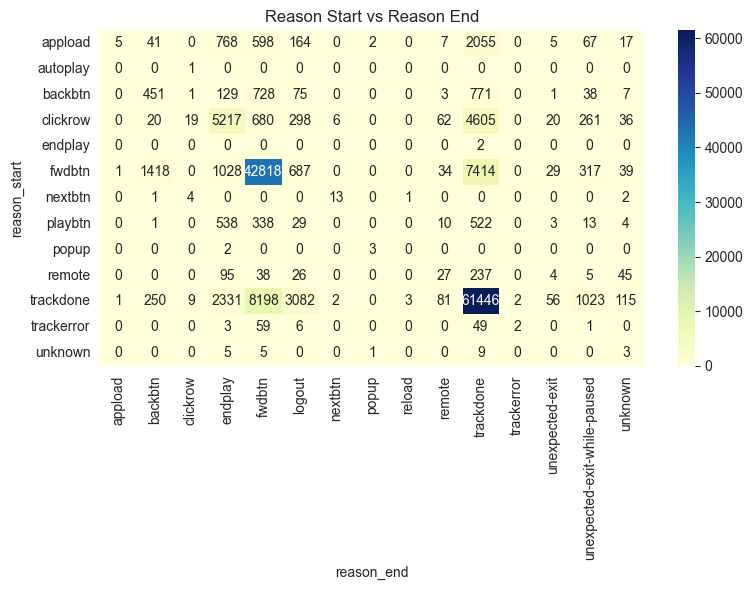

In [ ]:
pivot = pd.crosstab(df['reason_start'], df['reason_end'])

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Reason Start vs Reason End')
plt.tight_layout()
plt.show()


## Skipped vs Non-Skipped Tracks

C:\Users\Vikas\AppData\Local\Temp\ipykernel_9264\1198717300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='skipped', palette='coolwarm')


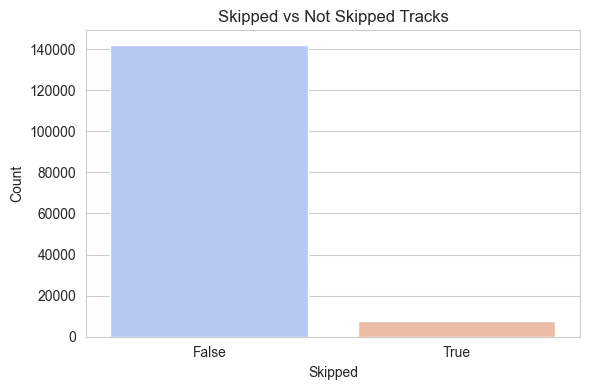

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='skipped', palette='coolwarm')
plt.title('Skipped vs Not Skipped Tracks')
plt.xlabel('Skipped')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Thank You